<div class="alert alert-info">
<p style="text-align:center">
    <a href="https://www.i2a2.academy/pt" target="_blank">
    <img src="https://static.wixstatic.com/media/b12e17_a52717e8445346ae808f308f705933fc~mv2.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>
</div>

<div class="alert alert-warning" style="margin-top: 20px">
<h2><center>Regras do jogo</center></h2>
</div>


### Dataset
<ul>
	<li><a>https://www.kaggle.com/datasets/nphantawee/pump-sensor-data</a></li>
</ul>

### Atividades
<ul>
    <li>Fazer a carga em um notebook (Google Colab ou Jupyter local)</li>
	<li>Realizar a análise dos dados (EDA)</li>
	<li>Investigar o código e discussões disponibilizados na página do dataset</li>
	<li>Montar um relatório com suas conclusões sobre o dataset (seja detalhista)</li>
	<li>Entregar o código fonte gerado e o relatório. Enviar e mail para XXXXX@i2a2.academy com o título “I2A2 ABDI Desafio 2”.</li>
	<li>Data de entrega: 27/02/2023 às 23h59 BRT.</li>
</ul>
    
### Opcionais:
<ul>
	<li>Ler o artigo " Anomaly Detection in Time Series Sensor Data" <a>https://towardsdatascience.com/anomaly-detection-in-time-series-sensor-data-86fd52e62538</a></li>
	<li>Refatorar o código utilizando algum LLM Large Language Model (ex. ChatGPT).</li>
</ul>

<div class="alert alert-warning" style="margin-top: 5px">
<h2><center>O problema</center></h2>
</div>
<p>Tenho um amigo que trabalha em uma pequena equipe que cuida da bomba d'água de uma pequena área longe da cidade grande, houve 7 falhas no sistema no ano passado. Essas falhas causam grandes problemas para muitas pessoas e também levam a alguns sérios problemas de vida de algumas famílias. A equipe não consegue ver nenhum padrão nos dados quando o sistema cai, então eles não sabem onde colocar mais atenção.</p>

<p>Como acredito no uso de dados para resolver problemas, peço a ele que forneça os dados do sensor disponíveis e espero que alguém aqui possa ajudar.</p>

<div class="alert alert-info" style="margin-top: 10px">
<h2><center>Insights</center></h2>

<ul>
    <li>Em quais datas o sistema esteve um falha?</li>
    <li>A falha foi total?</li>
    <li>Porque nenhum padrão é vísivel nos dados?</li>
    <li>Em quais sensores devem-se por maior atenção?</li>
</ul>

<div class="alert alert-info" style="margin-top: 5px">
<h2><center>Carregamento de bibliotecas e conjunto de dados</center></h2>
</div>

In [1]:
# Carregamento de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os


# Utilizar códigos abaixo somente se necessário para ignorar avisos 'warnings'
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Carrega os dados do arquivo CSV no dataframe: df
df = pd.read_csv(os.getcwd() + '\\sensor.csv', index_col=0)

<div class="alert alert-info" style="margin-top: 0px">
<h2><center>Exploratory Analysis Data - EDA</center></h2>
</div>

<div class="alert alert-success">
    <h2><strong><center>Sistema de bombeamento de água</center></strong></h2>
</div>

In [3]:
# Visualizar os dados carregados
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [4]:
df_mean = df.mean()

<div class="alert alert-info">
  <strong>Insight -</strong> A leitura do dataframe(df) os sensores possuem característica de mensuração de <strong>RPM e Volume</strong>.
</div>

In [5]:
# Analise de valores estatísticos padrão
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
sensor_00,210112.000000,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.000000,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.000000,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.000000,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.000000,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.000000,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.000000,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.000000,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.000000,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
sensor_09,215725.000000,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000


<div class="alert alert-danger">
  <strong>Atenção - </strong> A análise do objeto (df_mean_ascedenting) pode ser observado defeito no sensor: <strong>sensor_15</strong>.
</div>

<div class="alert alert-warning">
  <strong>Observe - </strong> O gráfico utliza os dados sem EDA - Análise Exploratória de dados.
</div>

Text(0.5, 1.0, 'Comportamento - Maquinas por Sensores')

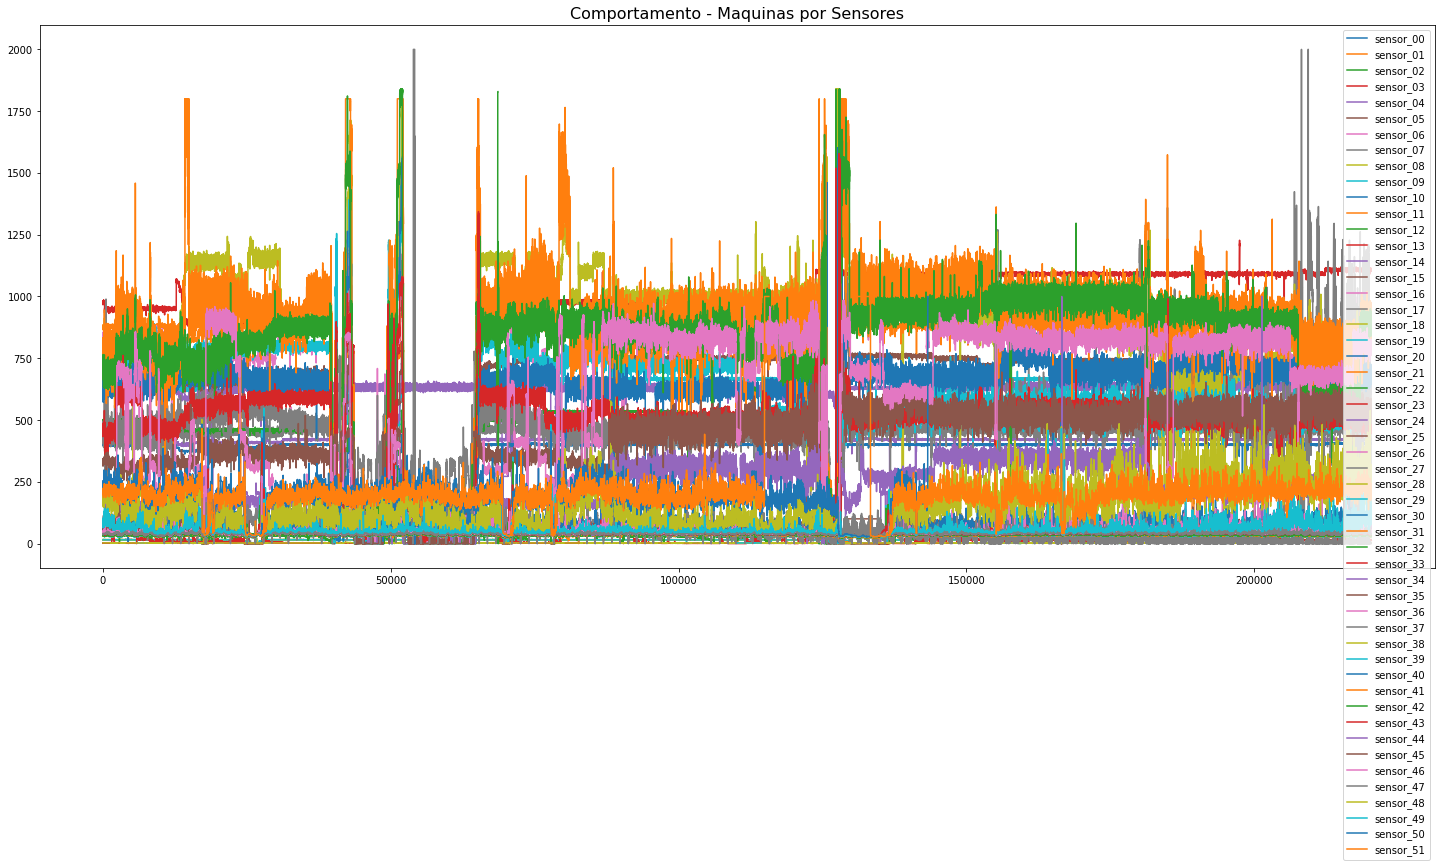

In [6]:
# Amostragem gráfica de linhas do comportamento de máquinas por sensores 
df.plot.line(figsize=(25,10)).set_title('Comportamento - Maquinas por Sensores', fontsize=16)

In [7]:
df_mean = df.mean()

Text(0.5, 1.0, 'Bombeamento - sem o tratamento dos dados')

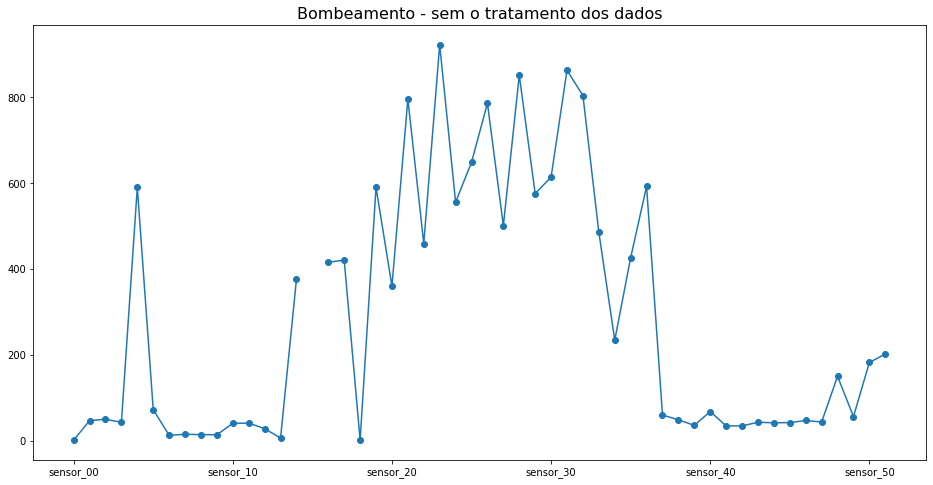

In [8]:
# Grafico do dataset sem tratamento.
df_mean.plot.line(figsize=(16,8), marker='o').set_title('Bombeamento - sem o tratamento dos dados', fontsize=16)

<div class="alert alert-block alert-info" style="margin-top: 5px">
<h3><center>Insight - Modelo de gráfico para o funcionamento de uma sistema de bombeamento de água</center></h3>
</div>

<div class="alert alert-success">
  <strong>Resultado -</strong> Apos a EDA houve necessidade de reorgnaizar as TAGs dos sensores.
</div>

In [9]:
# Reorganizar as TAGs dos sensores
df_new = df.rename(columns={'sensor_18': 'S00', 'sensor_00': 'S01', 'sensor_13':'S02', 'sensor_06':'S03', 'sensor_09':'S04',
                            'sensor_08':'S05','sensor_07':'S06', 'sensor_12':'S07','sensor_41':'S08','sensor_42':'S09',
                            'sensor_39':'S10','sensor_10':'S11','sensor_11':'S12','sensor_44':'S13','sensor_45':'S14',
                            'sensor_03':'S15','sensor_43':'S16','sensor_47':'S17','sensor_01':'S18','sensor_46':'S19',
                            'sensor_38':'S20','sensor_02':'S21','sensor_49':'S22','sensor_37':'S23','sensor_40':'S24',
                            'sensor_05':'S25','sensor_48':'S26','sensor_50':'S27','sensor_51':'S28','sensor_34':'S29',
                            'sensor_20':'S30','sensor_14':'S31','sensor_16':'S32','sensor_17':'S33','sensor_35':'S34',
                            'sensor_22':'S35','sensor_33':'S36','sensor_27':'S37','sensor_24':'S38','sensor_29':'S39',
                            'sensor_04':'S40','sensor_19':'S41','sensor_36':'S42','sensor_30':'S43','sensor_25':'S44',
                            'sensor_26':'S45','sensor_21':'S46','sensor_32':'S47','sensor_28':'S48','sensor_31':'S49',
                            'sensor_23':'S50','sensor_15':'S51'})

In [10]:
df_new_tag = df_new.reindex(sorted(df_new.columns), axis=1)

In [11]:
df_new_tag

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S44,S45,S46,S47,S48,S49,S50,S51,machine_status,timestamp
0,2.565284,2.465394,1.681353,13.41146,15.05353,15.56713,16.13136,31.11716,30.989580,31.770832,...,741.7151,848.0708,880.0001,680.4416,785.1935,682.8125,975.9409,NaN,NORMAL,2018-04-01 00:00:00
1,2.565284,2.465394,1.681353,13.41146,15.05353,15.56713,16.13136,31.11716,30.989580,31.770832,...,741.7151,848.0708,880.0001,680.4416,785.1935,682.8125,975.9409,NaN,NORMAL,2018-04-01 00:01:00
2,2.500062,2.444734,1.708474,13.32465,15.01013,15.61777,16.03733,32.08894,30.468750,31.770830,...,740.8031,849.8997,880.4237,694.7721,778.5734,721.8750,982.7342,NaN,NORMAL,2018-04-01 00:02:00
3,2.509521,2.460474,1.579427,13.31742,15.08247,15.69734,16.24711,31.67221,30.468750,31.510420,...,739.2722,847.7579,878.8917,683.3831,779.5091,754.6875,977.7520,NaN,NORMAL,2018-04-01 00:03:00
4,2.604785,2.445718,1.683831,13.35359,15.08247,15.69734,16.21094,31.95202,30.989580,31.510420,...,737.6033,846.9182,882.5874,702.4431,785.2307,766.1458,979.5755,NaN,NORMAL,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.499117,2.407350,13.265320,15.11863,15.16204,15.65393,16.65220,38.05424,30.468750,30.208330,...,700.5885,796.5964,894.5920,927.6135,779.2067,974.9999,1109.5010,NaN,NORMAL,2018-08-31 23:55:00
220316,2.618476,2.400463,13.242270,15.15480,15.11863,15.65393,16.70284,38.53485,30.208332,29.947920,...,698.4915,800.1906,895.5599,907.9463,797.5571,927.0833,1106.3710,NaN,NORMAL,2018-08-31 23:56:00
220317,2.620500,2.396528,13.188660,15.08970,15.11863,15.69734,16.70284,38.52678,29.947920,30.208330,...,703.1645,800.3767,892.2204,926.8102,799.3120,924.4791,1106.6980,NaN,NORMAL,2018-08-31 23:57:00
220318,2.514596,2.406366,13.173460,15.11863,15.11863,15.74074,16.56539,38.89159,29.947916,30.208332,...,697.3713,793.7070,887.9969,915.4362,793.0610,931.7708,1103.9550,NaN,NORMAL,2018-08-31 23:58:00


In [12]:
# Analise de valores estatísticos padrão: média
df_mean_new_tag = df_new_tag.mean()

In [13]:
df_mean_new_tag

S00      2.303785
S01      2.372221
S02      7.078858
S03     13.501537
S04     14.799210
S05     15.200721
S06     15.843152
S07     29.136975
S08     35.365126
S09     35.453455
S10     36.610444
S11     41.470339
S12     41.918319
S13     42.656877
S14     43.094984
S15     43.752481
S16     43.879591
S17     44.340903
S18     47.591611
S19     48.018585
S20     49.655946
S21     50.867392
S22     57.119968
S23     60.787360
S24     68.844530
S25     73.396414
S26    150.889044
S27    183.049260
S28    202.699667
S29    234.971776
S30    360.805165
S31    376.860041
S32    416.472892
S33    421.127517
S34    427.129817
S35    459.792815
S36    486.405980
S37    501.506589
S38    556.235397
S39    576.195305
S40    590.673936
S41    590.829775
S42    593.033876
S43    614.596442
S44    649.144799
S45    786.411781
S46    796.225942
S47    804.283915
S48    851.690339
S49    863.323100
S50    922.609264
S51           NaN
dtype: float64

In [14]:
# Default sort ascedenting
df_mean_ascedenting= df_mean.sort_values()

In [15]:
df_mean_ascedenting

sensor_18      2.303785
sensor_00      2.372221
sensor_13      7.078858
sensor_06     13.501537
sensor_09     14.799210
sensor_08     15.200721
sensor_07     15.843152
sensor_12     29.136975
sensor_41     35.365126
sensor_42     35.453455
sensor_39     36.610444
sensor_10     41.470339
sensor_11     41.918319
sensor_44     42.656877
sensor_45     43.094984
sensor_03     43.752481
sensor_43     43.879591
sensor_47     44.340903
sensor_01     47.591611
sensor_46     48.018585
sensor_38     49.655946
sensor_02     50.867392
sensor_49     57.119968
sensor_37     60.787360
sensor_40     68.844530
sensor_05     73.396414
sensor_48    150.889044
sensor_50    183.049260
sensor_51    202.699667
sensor_34    234.971776
sensor_20    360.805165
sensor_14    376.860041
sensor_16    416.472892
sensor_17    421.127517
sensor_35    427.129817
sensor_22    459.792815
sensor_33    486.405980
sensor_27    501.506589
sensor_24    556.235397
sensor_29    576.195305
sensor_04    590.673936
sensor_19    590

In [16]:
# Analise de valores estatísticos padrão: maxímo
df_max = df_new_tag.max(numeric_only=True)

In [17]:
df_max 

S00       4.873250
S01       2.549016
S02      31.187550
S03      22.251160
S04      25.000000
S05      24.348960
S06      23.596640
S07      45.000000
S08     420.312500
S09     374.218800
S10     547.916600
S11      76.106860
S12      60.000000
S13    1000.000000
S14     320.312500
S15      48.220490
S16     408.593700
S17     303.530100
S18      56.727430
S19     370.370400
S20     417.708300
S21      56.032990
S22     464.409700
S23     174.901200
S24     512.760400
S25      99.999880
S26     561.632000
S27    1000.000000
S28    1000.000000
S29     425.549800
S30     448.907900
S31     500.000000
S32     739.741500
S33     599.999939
S34     694.479126
S35     594.061100
S36    1578.600000
S37    2000.000000
S38    1000.000000
S39    1466.281000
S40     800.000000
S41     878.917900
S42     984.060700
S43    1600.000000
S44     839.575000
S45    1214.420000
S46    1107.526000
S47    1839.211000
S48    1841.146000
S49    1800.000000
S50    1227.564000
S51            NaN
dtype: float

In [18]:
# Analise de valores estatísticos padrão: minímo
df_min = df_new_tag.min(numeric_only=True)

In [19]:
df_min 

S00     0.000000
S01     0.000000
S02     0.000000
S03     0.014468
S04     0.000000
S05     0.028935
S06     0.000000
S07     0.000000
S08    20.833330
S09    22.135416
S10    19.270830
S11     0.000000
S12     0.000000
S13    25.752316
S14    26.331018
S15    31.640620
S16    24.479166
S17    27.199070
S18     0.000000
S19    26.331018
S20    24.479166
S21    33.159720
S22    26.620370
S23     0.000000
S24    23.437500
S25     0.000000
S26    26.331018
S27    27.488426
S28    27.777779
S29    54.882370
S30     0.000000
S31    32.409550
S32     0.000000
S33     0.000000
S34     0.000000
S35     0.000000
S36     6.460602
S37     0.000000
S38     0.000000
S39     0.636574
S40     2.798032
S41     0.000000
S42     2.260970
S43     0.000000
S44     0.000000
S45    43.154790
S46    95.527660
S47     0.240716
S48     4.319347
S49    23.958330
S50     0.000000
S51          NaN
dtype: float64

In [20]:
# Valor médio acrescido em 20% uma excelente taxa de sobrecarga.
df_mean_high = df_mean_ascedenting*1.2

In [21]:
# Valor médio com reução de 20% uma oscilação aceitavél.
df_mean_low = df_mean_ascedenting*0.8

<div class="alert alert-danger" style="margin-top: 10px">
<strong>Atenção - </strong> Os nomes dos sensores não seguem a ordem de funcionamento do sistema de bombeamento de água.
</div>

<div class="alert alert-warning">
<h2><center>Gráfico exemplifica o funcionamento de uma bomba de água.</center><h2>

<p style="text-align:center">
    <a href="https://www.researchgate.net/figure/Graph-of-power-of-water-pump-against-flow-rate-for-the-real-engine-and-simulator-cooling_fig7_309439547" target="_blank">
    <img src="https://www.researchgate.net/profile/Mohd-Rozi-Mohd-Perang-2/publication/309439547/figure/fig7/AS:421498679762947@1477504524206/Graph-of-power-of-water-pump-against-flow-rate-for-the-real-engine-and-simulator-cooling.png" width="200" alt="Pump Model" style="width:592px;height:432px;"/>
    </a>
</p>
</div>

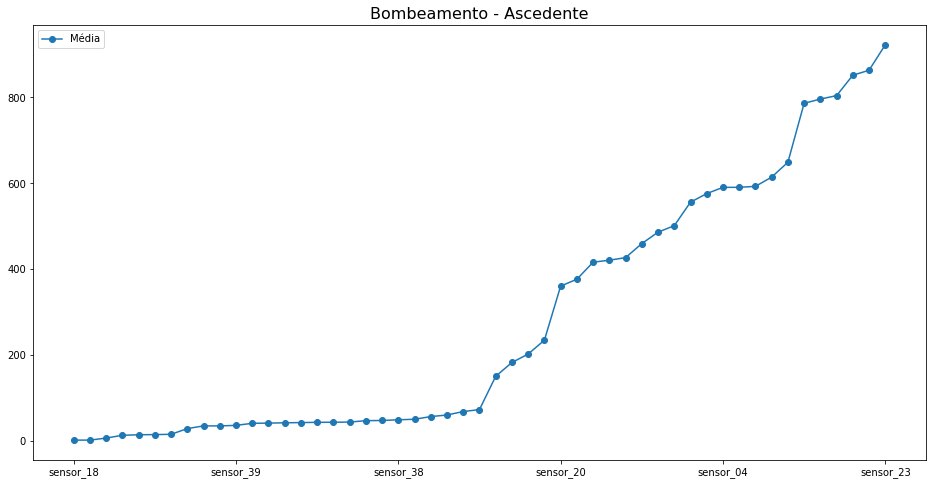

In [22]:
# Comportamento esperado do sistema de bombeamento de água - de lugar baixo para alto
df_mean_ascedenting.plot.line(figsize=(16,8), marker='o', label='Média').set_title('Bombeamento - Ascedente', fontsize=16)
plt.legend()

In [23]:
# Analise de valores estatísticos padrão: média
df_mean_new_tag = df_new_tag.corr().mean()

In [24]:
df_mean_new_tag

S00    0.356792
S01    0.197854
S02    0.206399
S03    0.259175
S04    0.200614
S05    0.206548
S06    0.216644
S07    0.212476
S08    0.105941
S09    0.089941
S10    0.087508
S11    0.246560
S12    0.241984
S13    0.176710
S14    0.151886
S15    0.191047
S16    0.137118
S17    0.164254
S18    0.217112
S19    0.165226
S20    0.152187
S21    0.192684
S22    0.187204
S23   -0.118868
S24    0.205414
S25    0.105771
S26    0.248378
S27    0.208832
S28    0.050874
S29    0.273188
S30    0.372886
S31    0.364419
S32    0.368059
S33    0.360259
S34    0.307306
S35    0.375650
S36    0.331085
S37    0.198864
S38    0.366508
S39    0.258495
S40    0.229756
S41    0.372495
S42    0.274812
S43    0.334485
S44    0.372199
S45    0.369639
S46    0.374855
S47    0.322261
S48    0.262272
S49    0.298862
S50    0.377445
S51         NaN
dtype: float64

In [25]:
df_corr = df.corr().mean()

In [26]:
df_corr_sorted = df_corr.sort_values()

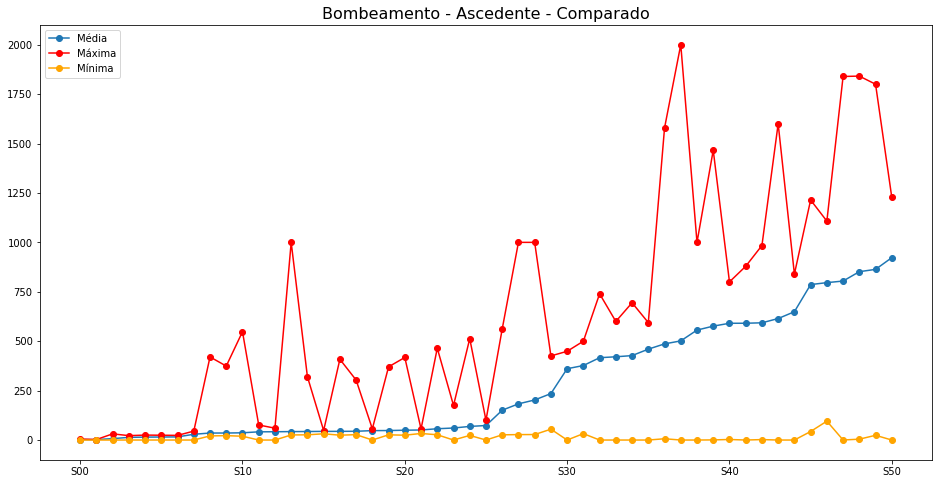

In [27]:
# Comportamento esperado do sistema de bombeamento de água - de lugar baixo para alto
df_mean_ascedenting.plot.line(figsize=(16,8), marker='o', label='Média').set_title('Bombeamento - Ascedente - Comparado', fontsize=16)
#df_mean_high.plot.line(marker='o', color='black', label='Média + 20%')
#df_mean_low.plot.line(marker='o', color='yellow', label='Média = 80%')
df_max.plot.line(marker='o', color='red', label='Máxima')
df_min.plot.line(marker='o', color='orange', label='Mínima')

plt.legend()

<div class="alert alert-info">
  <strong>Insight -</strong> A leitura do dataframe(df) os sensores possuem característica de mensuração em correlação.
</div>

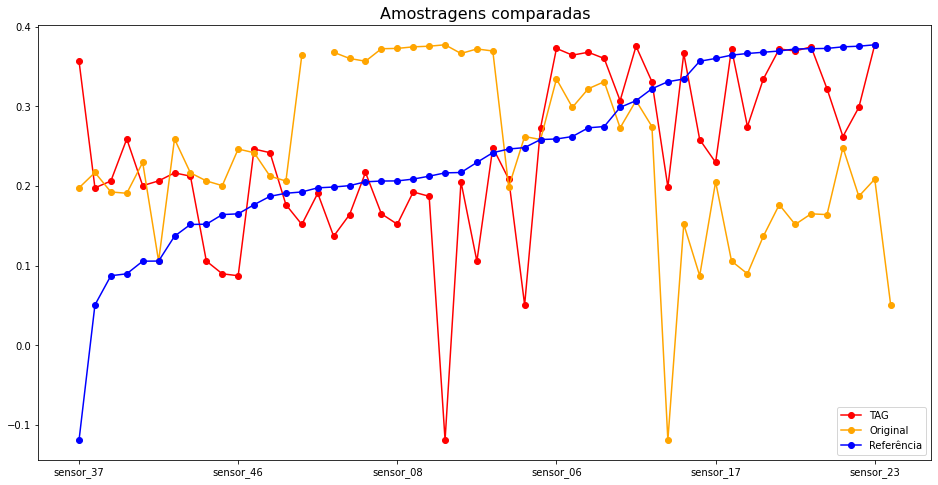

In [48]:
# Comportamento esperado do sistema de bombeamento de água - de lugar baixo para alto
df_mean_new_tag.plot.line(figsize=(16,8), marker='o', color='red', label='TAG').set_title('Amostragens comparadas', fontsize=16)
df_corr.plot.line(marker='o', color='orange', label='Original')
df_corr_sorted.plot.line(marker='o', color='blue', label='Referência')

plt.legend()

<div class="alert alert-danger">
  <strong>Atenção - </strong> A análise gráfica pode ser observado defeito nos sensores: <strong>sensor_37</strong> e <strong>sensor_51</strong>.
</div>

Text(0.5, 1.0, 'Bombeamento - Difuso (Ordem do dataset)')

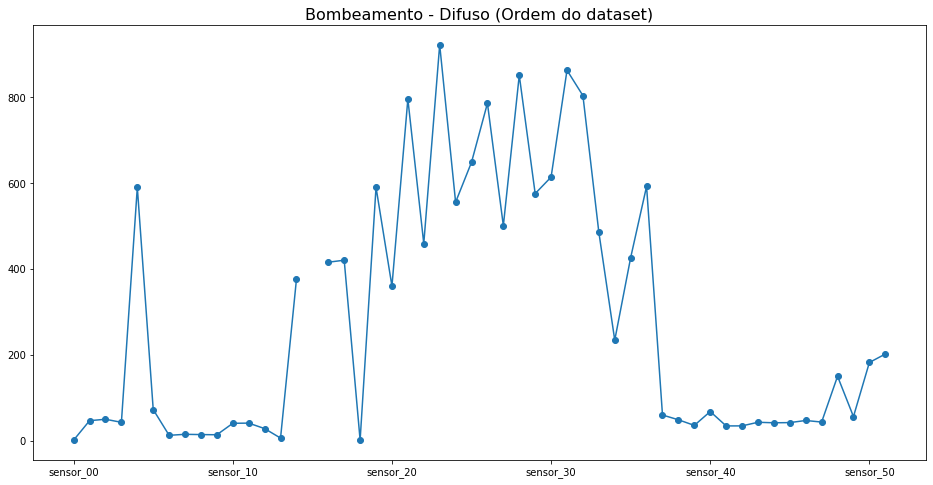

In [29]:
# Erro de documentação, anotação ou de etiquetamento(TAG's)
plt.figure(figsize=(16,8))
df_mean.plot.line(marker='o').set_title('Bombeamento - Difuso (Ordem do dataset)', fontsize=16)

<div class="alert alert-info" style="margin-top: 5px">
<h2><center>Exploratory Analysis Data - EDA - Sensores</center></h2>
</div>

<div class="alert alert-warning">
  <strong>Observe -   Análise de valores mínimo (zero) - </strong> Para este sistema o não fucionamento deve estar parametrizado em 0.00 qualquer valor acima é um possível descalibração, falha ou defeito
</div>

<div class="alert alert-warning">
<h2><center>Gráfico exemplifica o funcionamento de um sensor. (zero, range e span)</center><h2>

<p style="text-align:center">
    <a href="https://www.smar.com/en/technical-article/a-few-important-concepts-about-pressure-transmitters" target="_blank">
    <img src="https://www.smar.com/public/img/files/f2(14).jpg" width="200" alt="Pump Model" style="width:592px;height:432px;"/>
    </a>
</p>
</div>

In [30]:
# Análise de valores estatísticos padrão: Mínimo
df_T = df.describe().T

In [31]:
df_T.sort_values(by=['min']).style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
sensor_00,210112.000000,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_37,220304.000000,60.787360,37.604883,0.000000,28.799220,64.295485,90.821928,174.901200
sensor_35,220304.000000,427.129817,141.772519,0.000000,353.176625,473.349350,528.891025,694.479126
sensor_30,220059.000000,614.596442,195.726872,0.000000,627.777800,668.981400,697.222200,1600.000000
sensor_27,220304.000000,501.506589,169.823173,0.000000,448.297950,494.468450,536.274550,2000.000000
sensor_25,220284.000000,649.144799,220.865166,0.000000,693.957800,740.203500,750.357125,839.575000
sensor_24,220304.000000,556.235397,182.297979,0.000000,601.151050,625.873500,628.607725,1000.000000
sensor_23,220304.000000,922.609264,291.835280,0.000000,950.922400,981.925000,1090.808000,1227.564000
sensor_20,220304.000000,360.805165,101.974118,0.000000,398.021500,399.367000,400.088400,448.907900
sensor_19,220304.000000,590.829775,199.345820,0.000000,662.768975,665.672400,667.146700,878.917900


In [32]:
df_min = df_T.sort_values(by=['min'])

In [33]:
df_zero = df_min['min'].apply(lambda x: 'zero' if x==0 else 'manutencao' )

<div class="alert alert-info">
  <strong>Insight -</strong> Classificação de sensores que possuem o zero e os que não possuem e necessitam de manutenção do seu respectivo sensor ou no sistema de entrada de sensoreamento (INPUT).
</div>

In [34]:
df_zero

sensor_00          zero
sensor_37          zero
sensor_35          zero
sensor_30          zero
sensor_27          zero
sensor_25          zero
sensor_24          zero
sensor_23          zero
sensor_20          zero
sensor_19          zero
sensor_18          zero
sensor_17          zero
sensor_16          zero
sensor_22          zero
sensor_01          zero
sensor_12          zero
sensor_11          zero
sensor_10          zero
sensor_09          zero
sensor_13          zero
sensor_07          zero
sensor_05          zero
sensor_06    manutencao
sensor_08    manutencao
sensor_32    manutencao
sensor_29    manutencao
sensor_36    manutencao
sensor_04    manutencao
sensor_28    manutencao
sensor_33    manutencao
sensor_39    manutencao
sensor_41    manutencao
sensor_42    manutencao
sensor_40    manutencao
sensor_31    manutencao
sensor_43    manutencao
sensor_38    manutencao
sensor_44    manutencao
sensor_45    manutencao
sensor_48    manutencao
sensor_46    manutencao
sensor_49    man

<div class="alert alert-danger">
  <strong>Atenção - </strong> 30 sensores necessitam de manutenção.
</div>

In [35]:
# Transforma o objeto df_zero em dataframe
df_manutencao = pd.DataFrame(data=df_zero)

In [36]:
# Deleta as linha que contem 'zero'.
df_manutencao_zero = df_manutencao[df_manutencao["min"].str.contains("zero") == False]

In [37]:
# Lista de sensores que necesitam de manutenção.
df_manutencao_zero

,min
sensor_06,manutencao
sensor_08,manutencao
sensor_32,manutencao
sensor_29,manutencao
sensor_36,manutencao
sensor_04,manutencao
sensor_28,manutencao
sensor_33,manutencao
sensor_39,manutencao
sensor_41,manutencao


<div class="alert alert-info" style="margin-top: 5px">
<h2><center>Exploratory Analysis Data - EDA - Análise de processo</center></h2>
</div>

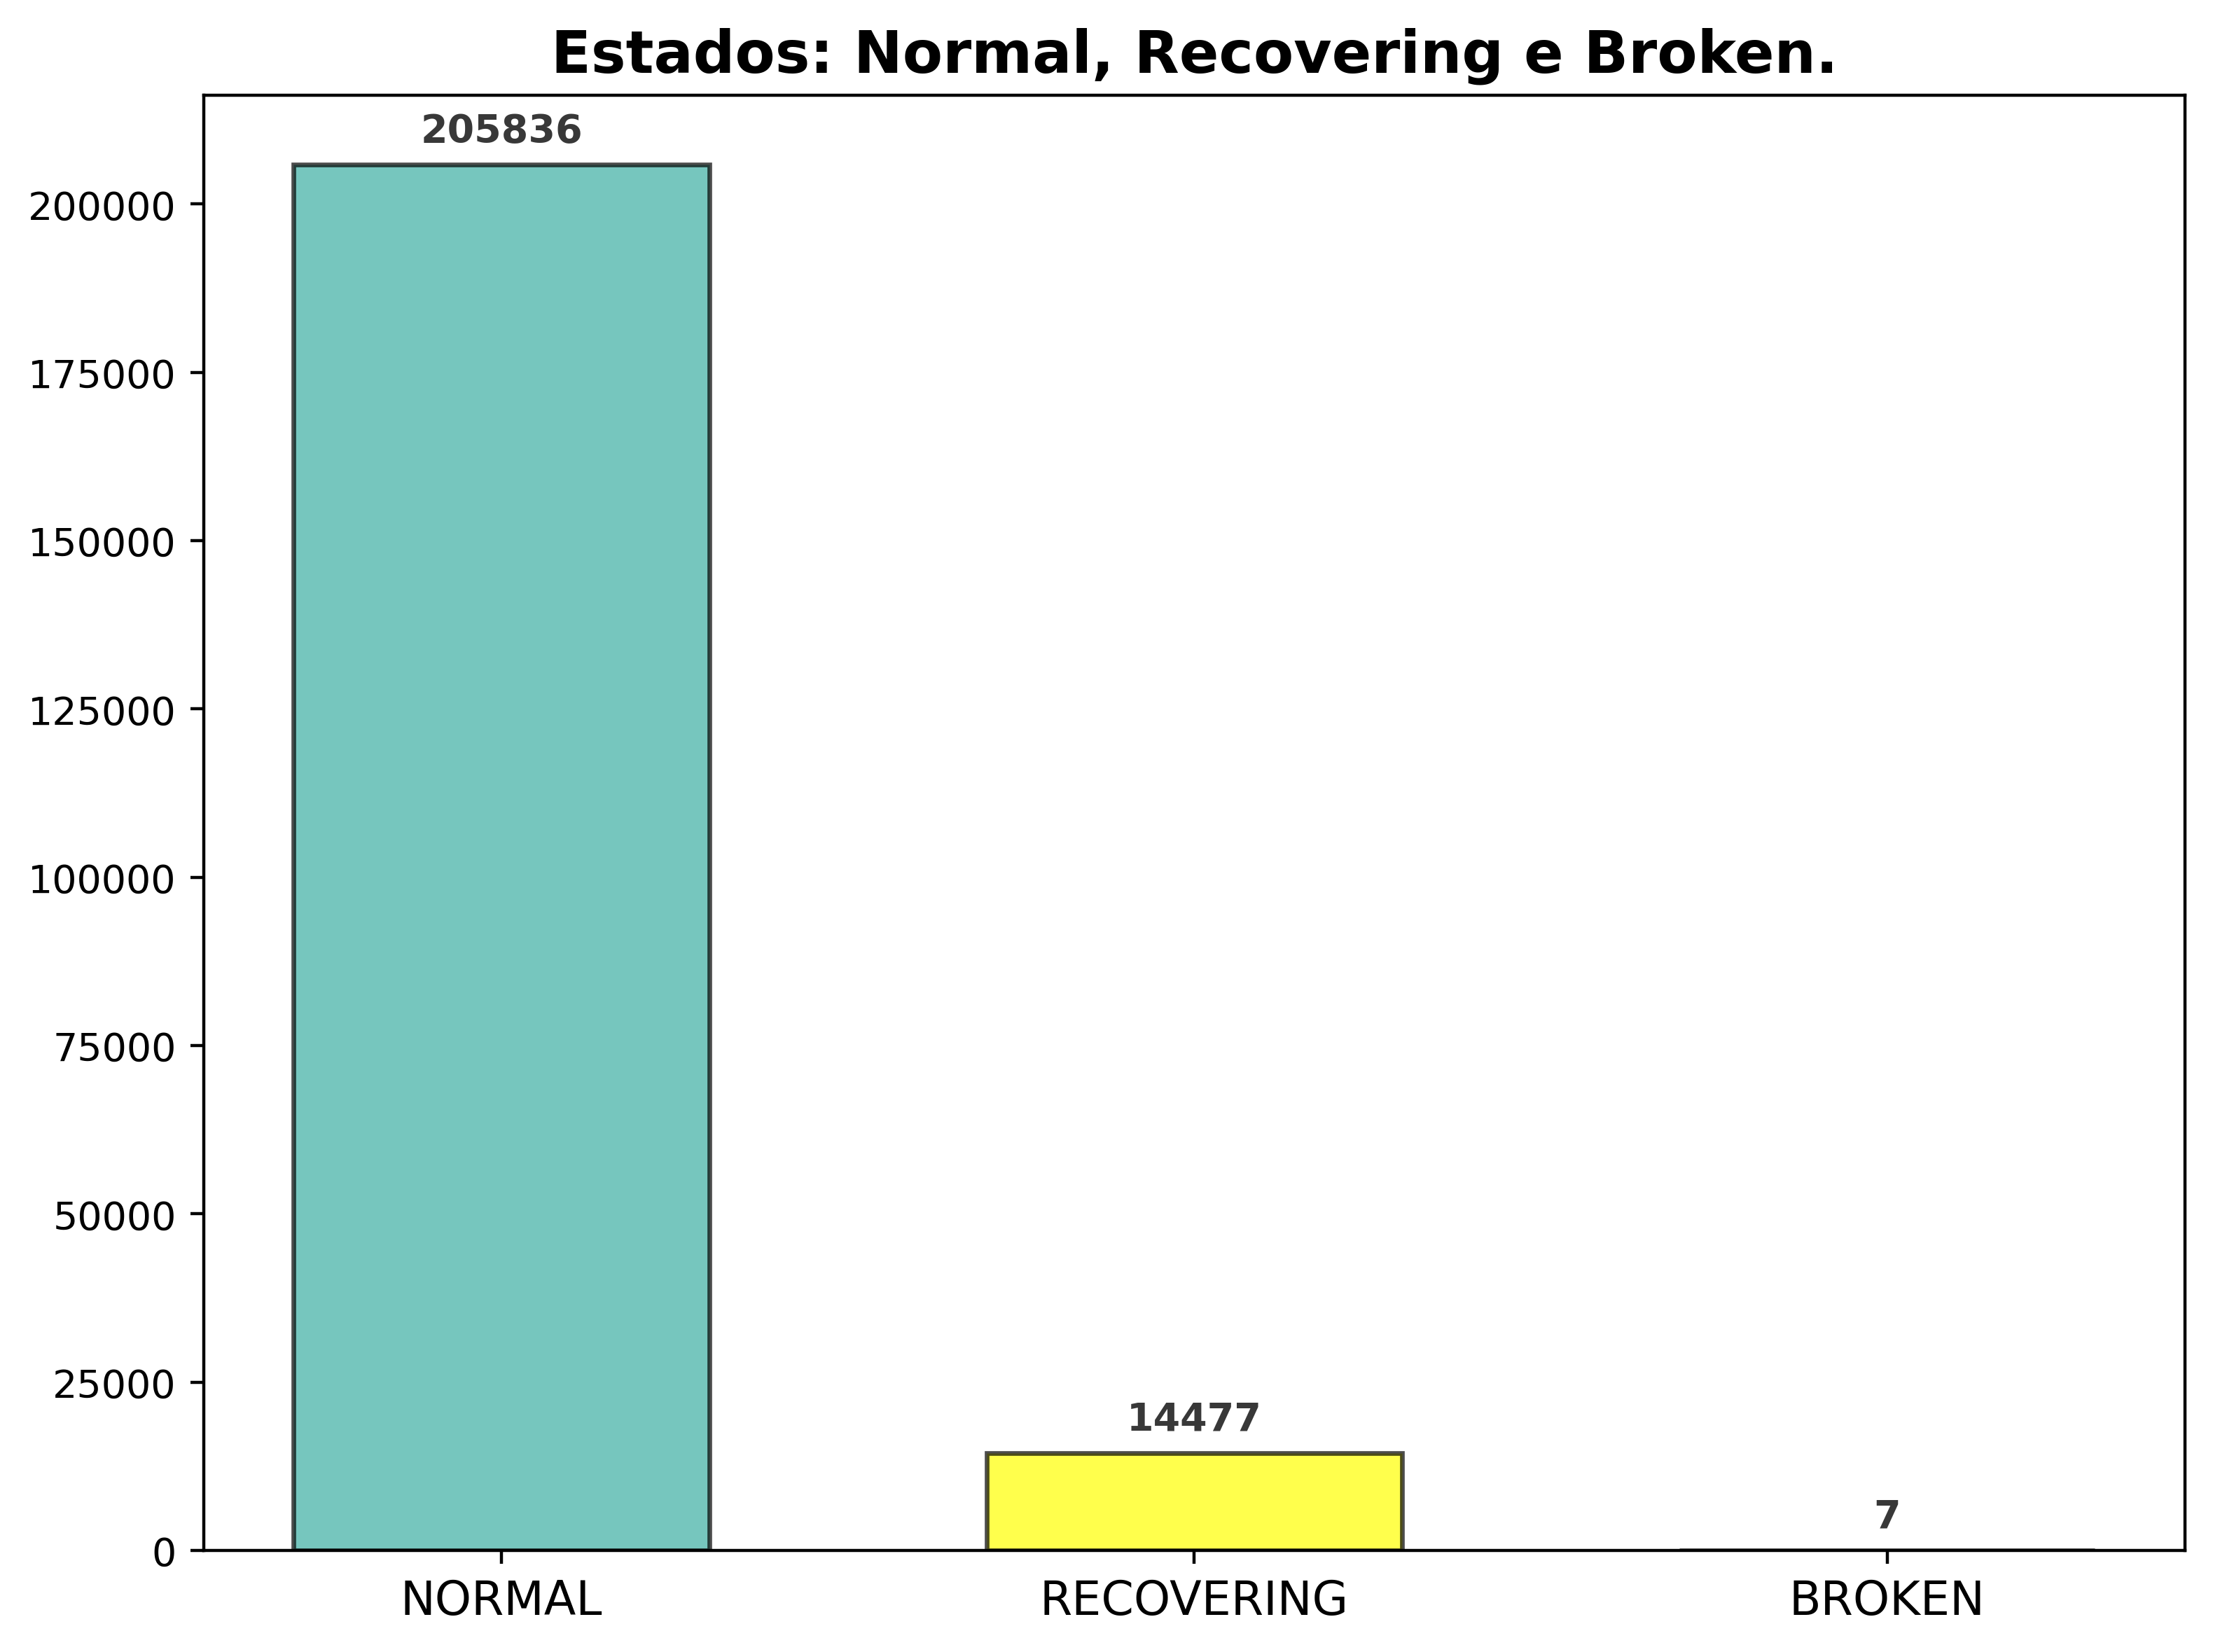

In [38]:
# label check (extremely imbalanced label, real world)
label = df['machine_status'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=400)
color_map = ['yellow' for _ in range(len(df['machine_status'].value_counts()))]
color_map[0] = "#3caea3"

ax.bar(label.index, label, alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
ax.set_title('Estados: Normal, Recovering e Broken.', fontsize=15, fontweight='bold', position=(0.5, 0.5))

for i in label.index:
    ax.annotate(f"{label[i]}",
                xy=(i, label[i] + 5000),
                va='center', ha='center', fontweight='bold', color='#383838')
    
ax.set_xticklabels(label.index, fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [39]:
df_new_tag

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S44,S45,S46,S47,S48,S49,S50,S51,machine_status,timestamp
0,2.565284,2.465394,1.681353,13.41146,15.05353,15.56713,16.13136,31.11716,30.989580,31.770832,...,741.7151,848.0708,880.0001,680.4416,785.1935,682.8125,975.9409,NaN,NORMAL,2018-04-01 00:00:00
1,2.565284,2.465394,1.681353,13.41146,15.05353,15.56713,16.13136,31.11716,30.989580,31.770832,...,741.7151,848.0708,880.0001,680.4416,785.1935,682.8125,975.9409,NaN,NORMAL,2018-04-01 00:01:00
2,2.500062,2.444734,1.708474,13.32465,15.01013,15.61777,16.03733,32.08894,30.468750,31.770830,...,740.8031,849.8997,880.4237,694.7721,778.5734,721.8750,982.7342,NaN,NORMAL,2018-04-01 00:02:00
3,2.509521,2.460474,1.579427,13.31742,15.08247,15.69734,16.24711,31.67221,30.468750,31.510420,...,739.2722,847.7579,878.8917,683.3831,779.5091,754.6875,977.7520,NaN,NORMAL,2018-04-01 00:03:00
4,2.604785,2.445718,1.683831,13.35359,15.08247,15.69734,16.21094,31.95202,30.989580,31.510420,...,737.6033,846.9182,882.5874,702.4431,785.2307,766.1458,979.5755,NaN,NORMAL,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.499117,2.407350,13.265320,15.11863,15.16204,15.65393,16.65220,38.05424,30.468750,30.208330,...,700.5885,796.5964,894.5920,927.6135,779.2067,974.9999,1109.5010,NaN,NORMAL,2018-08-31 23:55:00
220316,2.618476,2.400463,13.242270,15.15480,15.11863,15.65393,16.70284,38.53485,30.208332,29.947920,...,698.4915,800.1906,895.5599,907.9463,797.5571,927.0833,1106.3710,NaN,NORMAL,2018-08-31 23:56:00
220317,2.620500,2.396528,13.188660,15.08970,15.11863,15.69734,16.70284,38.52678,29.947920,30.208330,...,703.1645,800.3767,892.2204,926.8102,799.3120,924.4791,1106.6980,NaN,NORMAL,2018-08-31 23:57:00
220318,2.514596,2.406366,13.173460,15.11863,15.11863,15.74074,16.56539,38.89159,29.947916,30.208332,...,697.3713,793.7070,887.9969,915.4362,793.0610,931.7708,1103.9550,NaN,NORMAL,2018-08-31 23:58:00


In [40]:
# Carrega os dados do arquivo CSV no dataframe: df
df_ideal = pd.read_csv(os.getcwd() + '\\ideal_sensor.csv', index_col=0)

In [41]:
# Reorganizar as TAGs dos sensores
df_new_ideal = df_ideal.rename(columns={'sensor_18': 'S00', 'sensor_00': 'S01', 'sensor_13':'S02', 'sensor_06':'S03', 'sensor_09':'S04',
                            'sensor_08':'S05','sensor_07':'S06', 'sensor_12':'S07','sensor_41':'S08','sensor_42':'S09',
                            'sensor_39':'S10','sensor_10':'S11','sensor_11':'S12','sensor_44':'S13','sensor_45':'S14',
                            'sensor_03':'S15','sensor_43':'S16','sensor_47':'S17','sensor_01':'S18','sensor_46':'S19',
                            'sensor_38':'S20','sensor_02':'S21','sensor_49':'S22','sensor_37':'S23','sensor_40':'S24',
                            'sensor_05':'S25','sensor_48':'S26','sensor_50':'S27','sensor_51':'S28','sensor_34':'S29',
                            'sensor_20':'S30','sensor_14':'S31','sensor_16':'S32','sensor_17':'S33','sensor_35':'S34',
                            'sensor_22':'S35','sensor_33':'S36','sensor_27':'S37','sensor_24':'S38','sensor_29':'S39',
                            'sensor_04':'S40','sensor_19':'S41','sensor_36':'S42','sensor_30':'S43','sensor_25':'S44',
                            'sensor_26':'S45','sensor_21':'S46','sensor_32':'S47','sensor_28':'S48','sensor_31':'S49',
                            'sensor_23':'S50','sensor_15':'S51'})

In [42]:
df_ideal_tag = df_new_ideal.reindex(sorted(df_new_ideal.columns), axis=1)

In [43]:
df_ideal_tag

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S44,S45,S46,S47,S48,S49,S50,S51,machine_status,timestamp
Column1,,,,,,,,,,,,,,,,,,,,,
0,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-04-01 00:00:00
1,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-04-01 00:01:00
2,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-04-01 00:02:00
3,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-04-01 00:03:00
4,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-08-31 23:55:00
220316,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-08-31 23:56:00
220317,2.303785,2.372221,7.078858,13.501537,14.79921,15.200721,15.843152,29.136975,35.365126,35.453455,...,649.144799,786.411781,796.225942,804.283915,851.690339,863.3231,922.609264,NaN,NORMAL,2018-08-31 23:57:00


In [44]:
# get useful columns and rows
sensor_cols = df_ideal_tag.iloc[:,1:54]
broken_rows = df_ideal_tag[df_ideal_tag['machine_status']=='BROKEN']
recovery_rows = df_ideal_tag[df_ideal_tag['machine_status']=='RECOVERING']
normal_rows = df_ideal_tag[df_ideal_tag['machine_status']=='NORMAL']
machine_status_col = df_ideal_tag['machine_status']

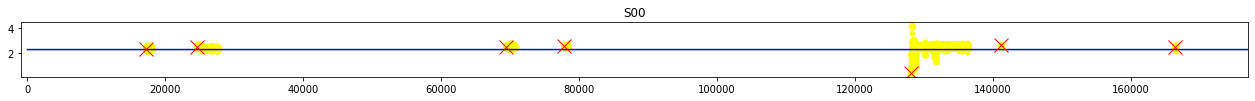

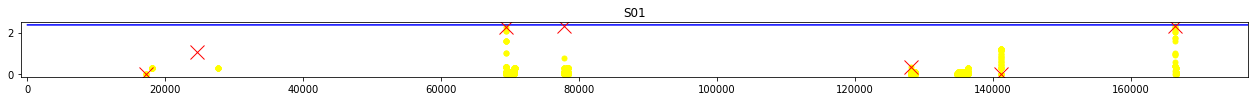

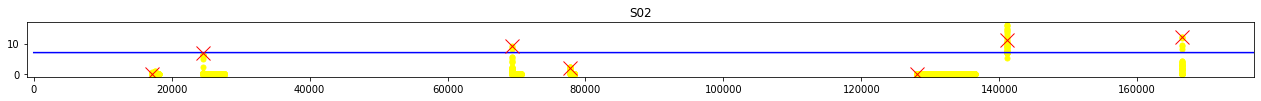

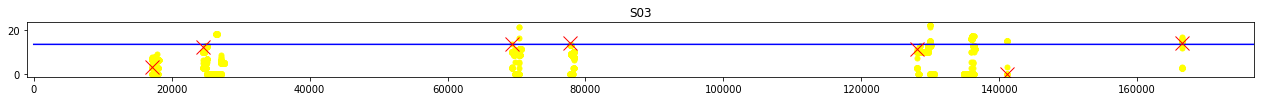

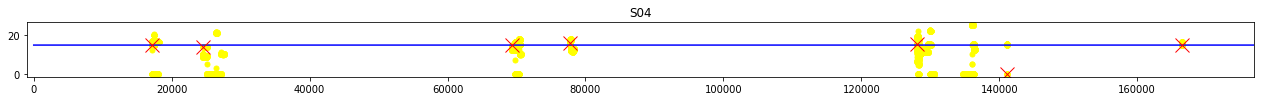

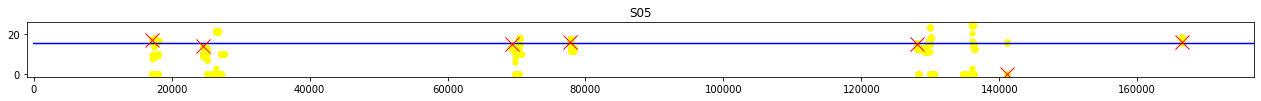

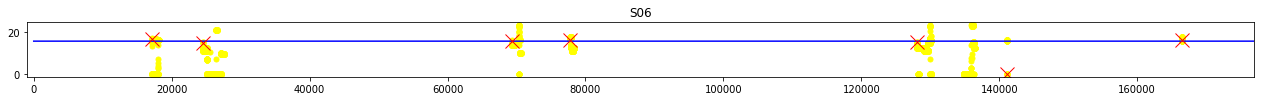

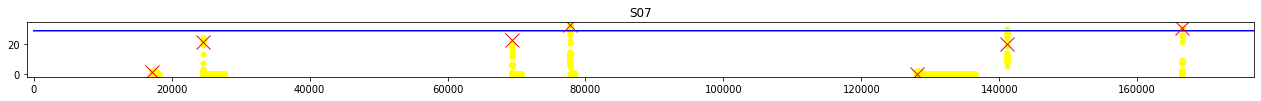

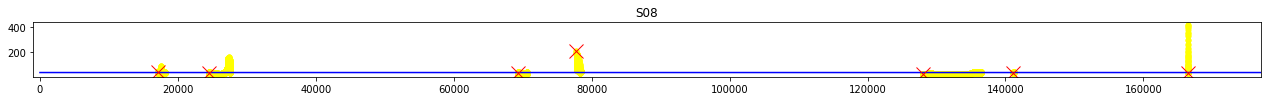

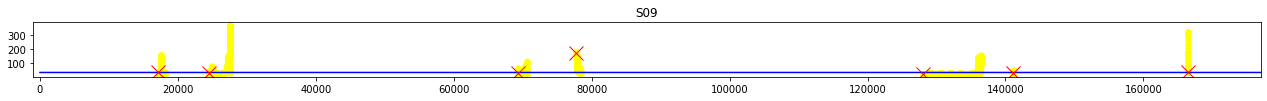

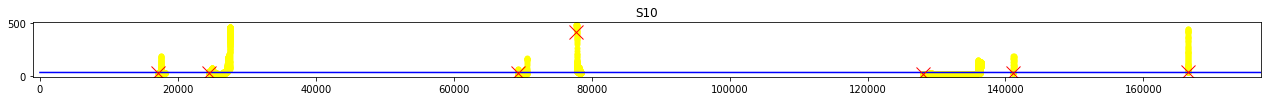

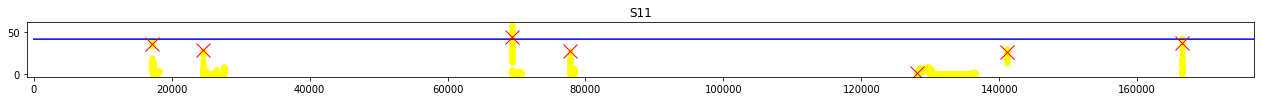

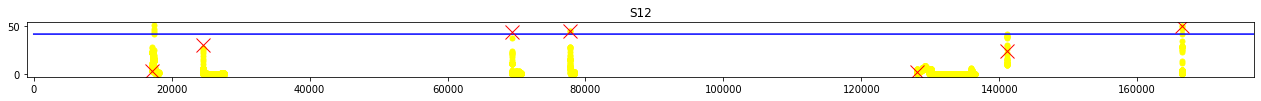

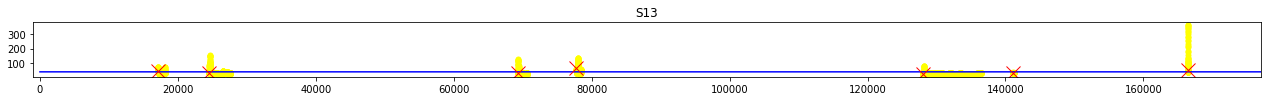

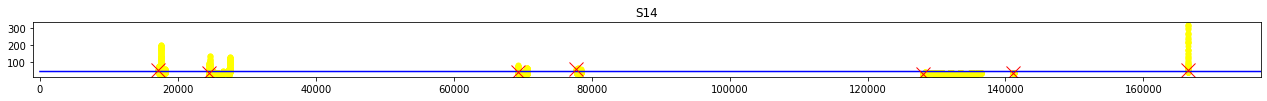

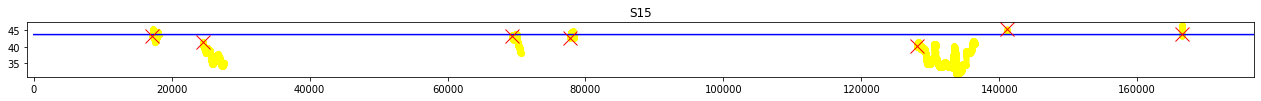

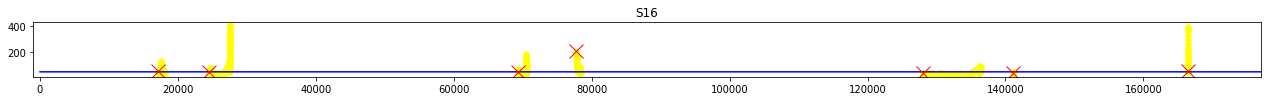

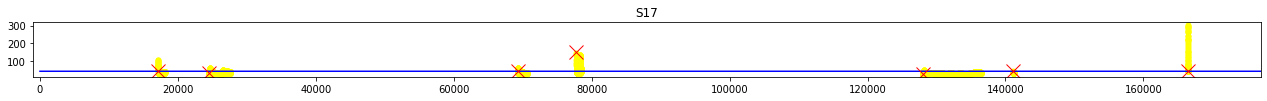

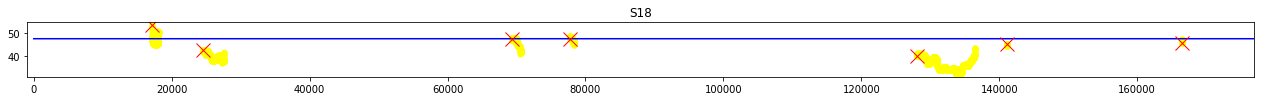

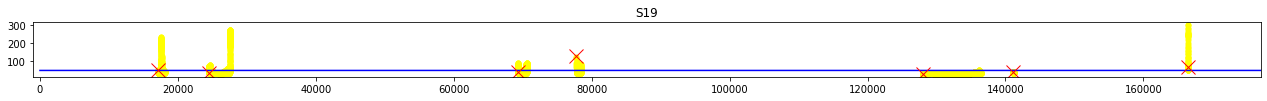

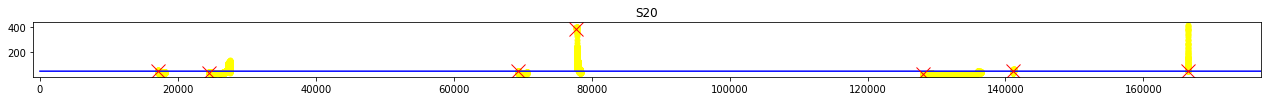

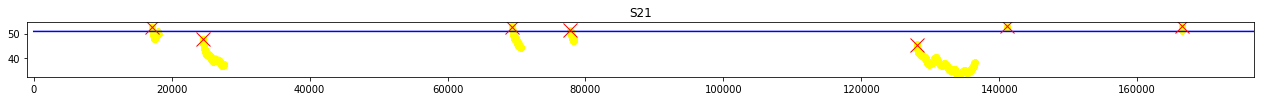

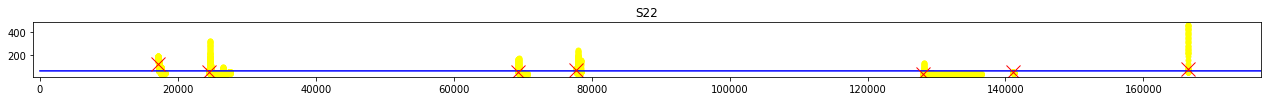

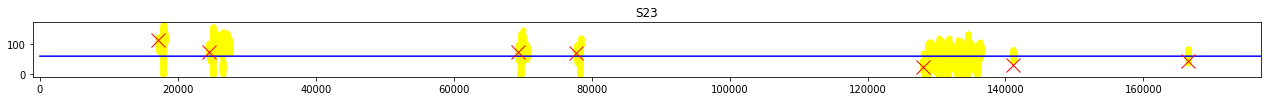

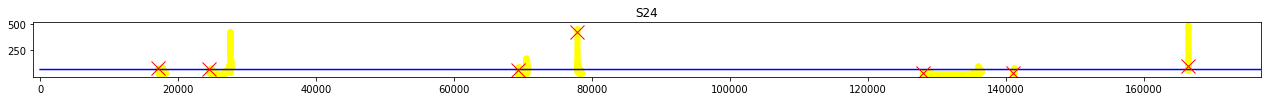

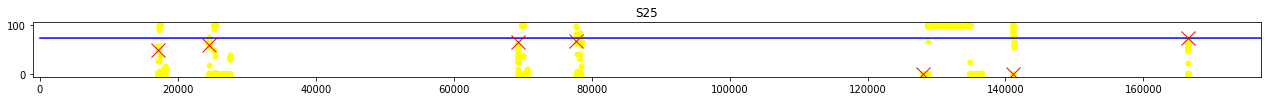

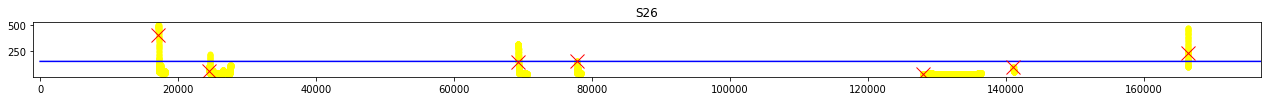

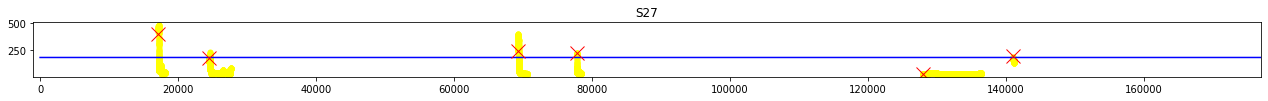

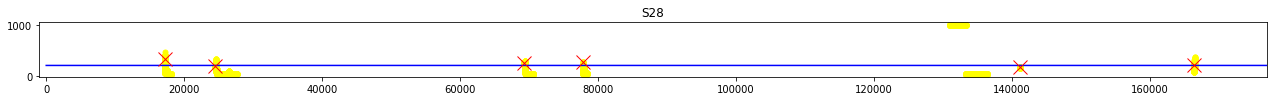

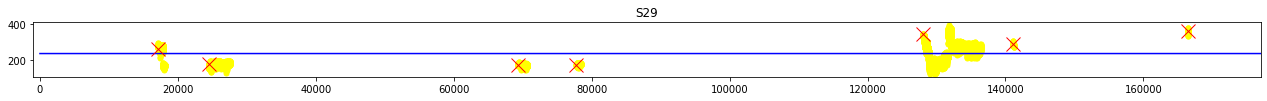

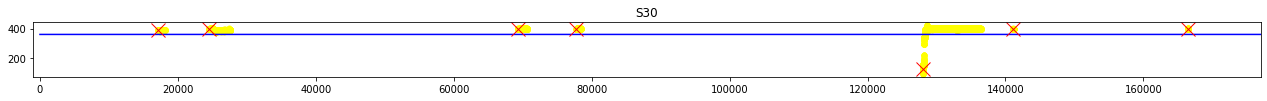

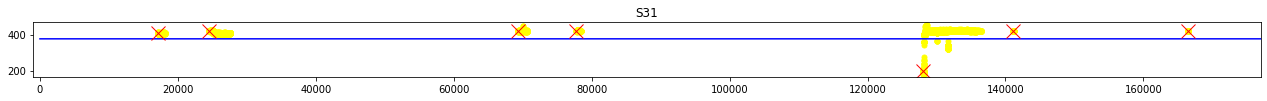

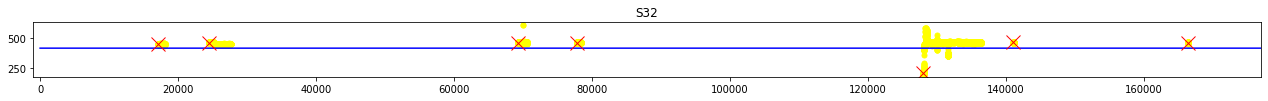

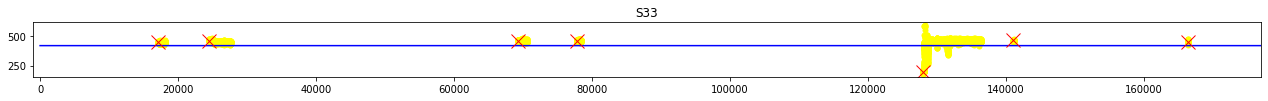

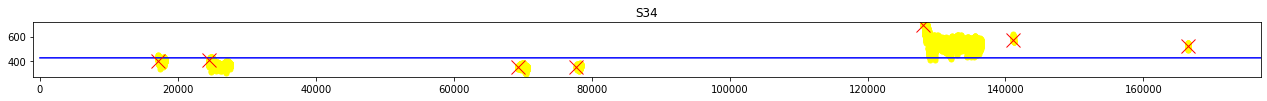

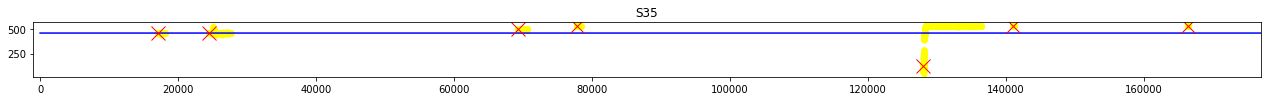

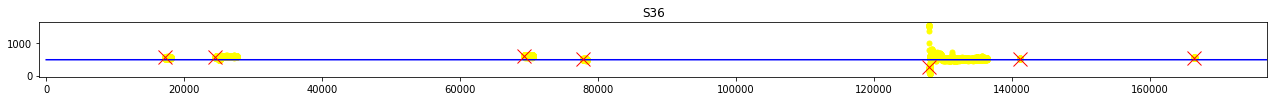

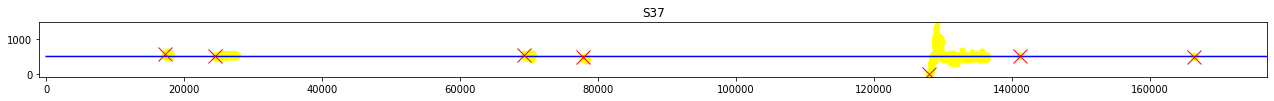

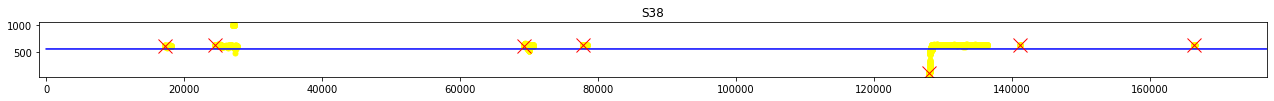

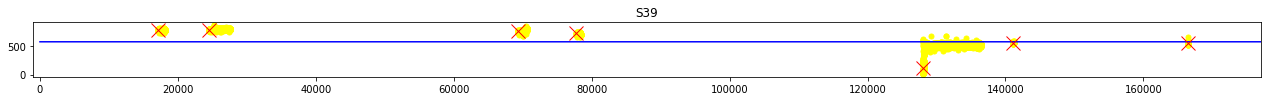

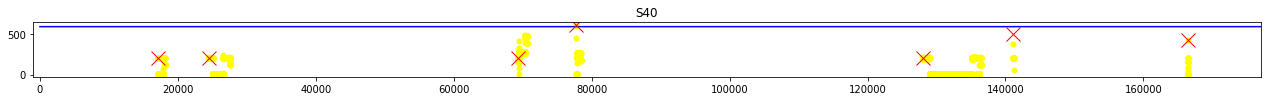

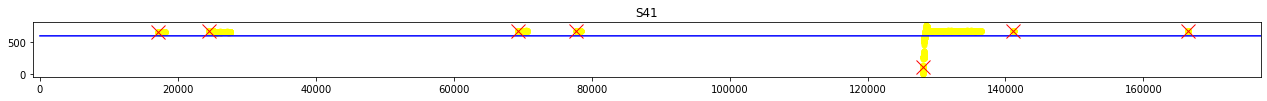

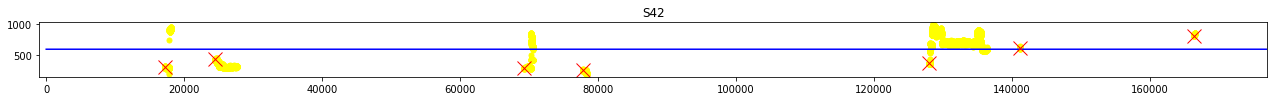

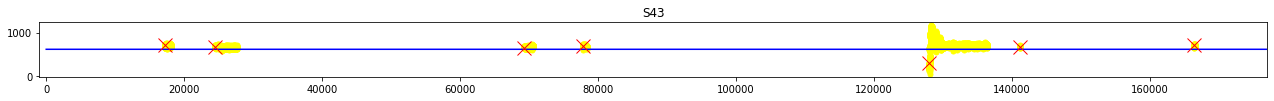

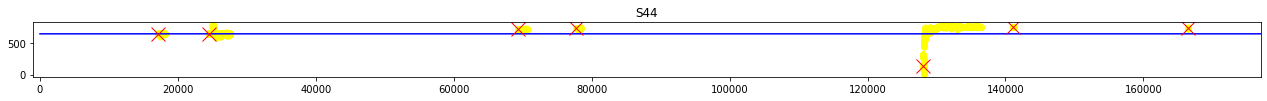

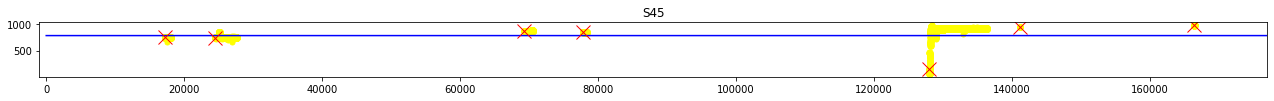

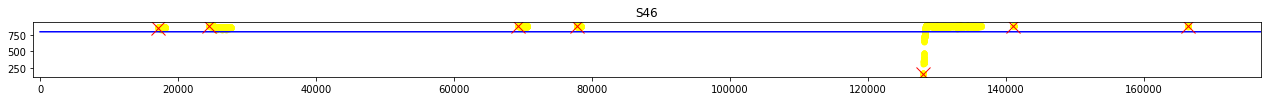

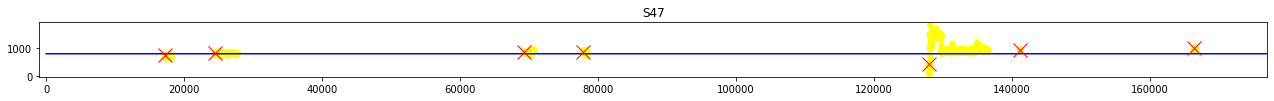

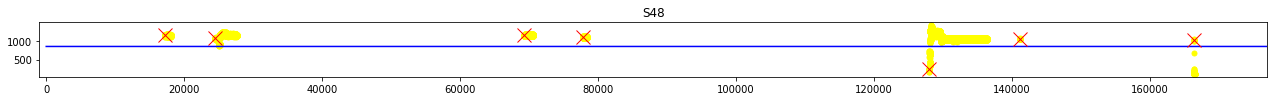

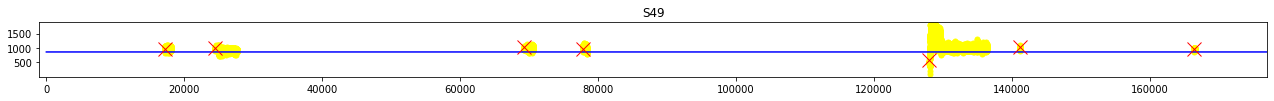

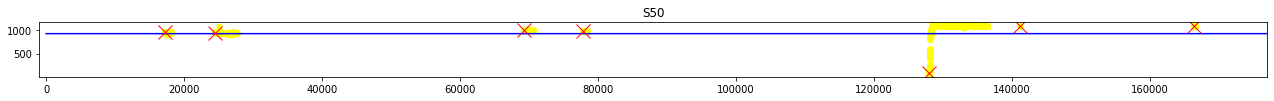

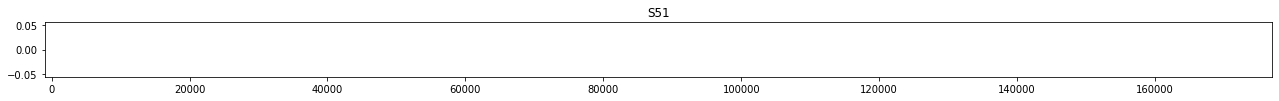

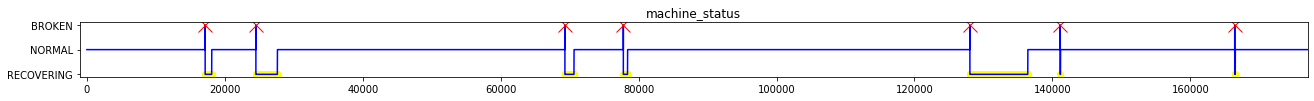

In [49]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(df_ideal_tag[sensor], color='blue')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='x', color='red', markersize=14)
    plot = plt.title(sensor)
    plt.xlim((-1000,177000))
    plt.show();

In [50]:
# get useful columns and rows
sensor_cols = df_new_tag.iloc[:,0:53]
broken_rows = df_new_tag[df_new_tag['machine_status']=='BROKEN']
recovery_rows = df_new_tag[df_new_tag['machine_status']=='RECOVERING']
normal_rows = df_new[df_new_tag['machine_status']=='NORMAL']
machine_status_col = df_new_tag['machine_status']

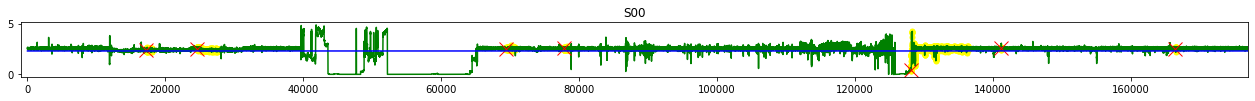

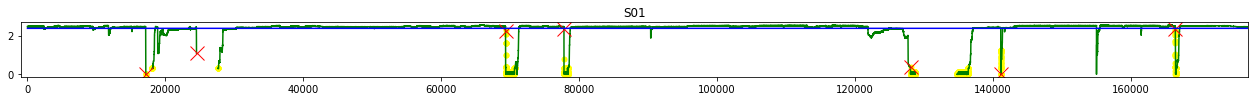

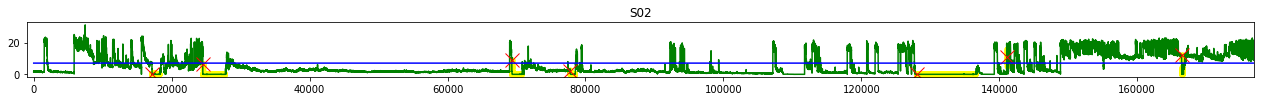

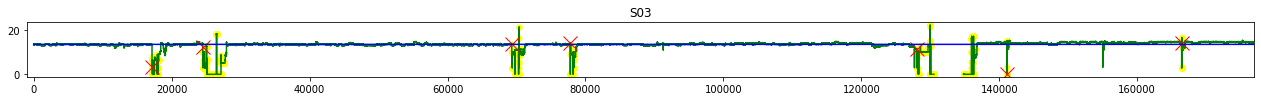

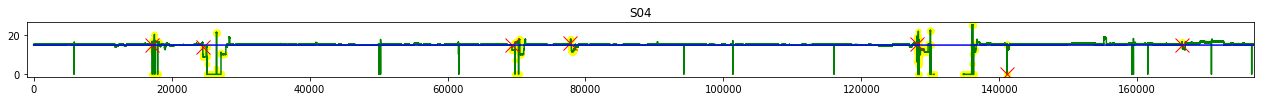

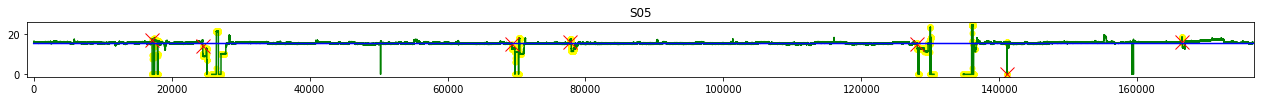

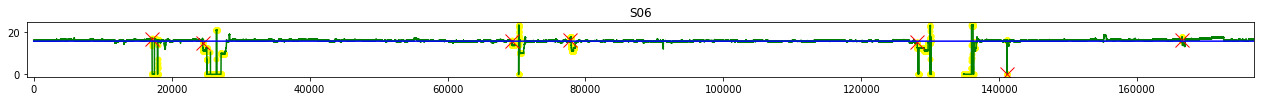

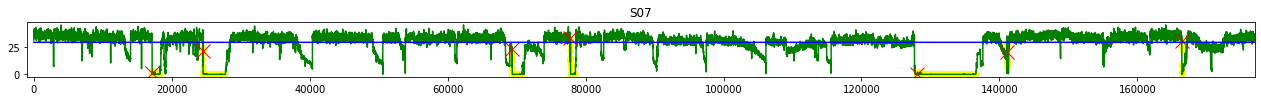

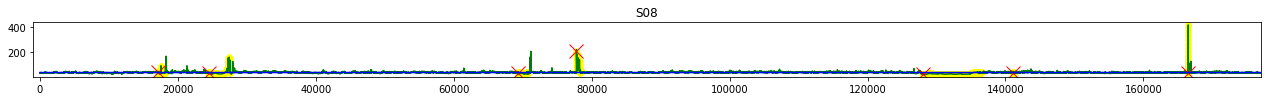

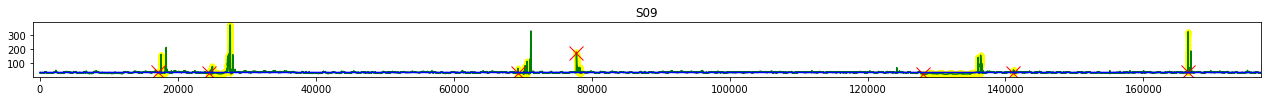

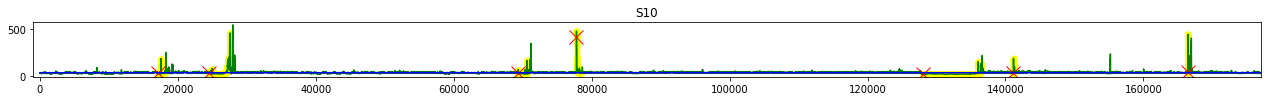

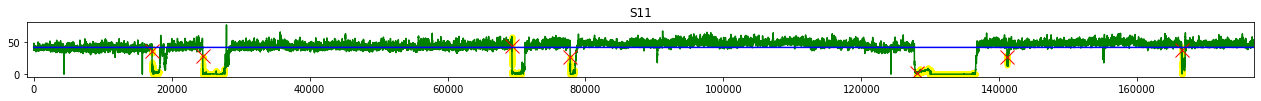

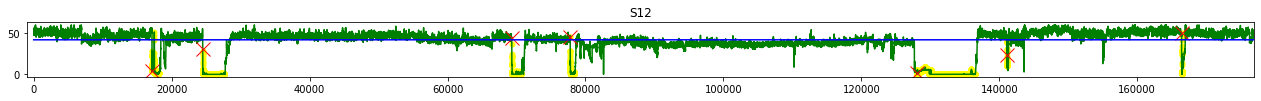

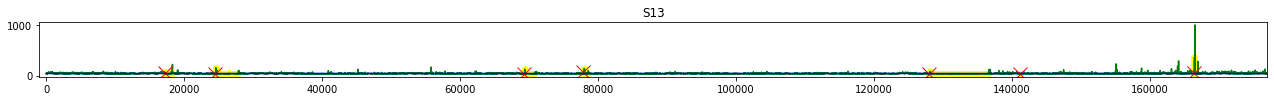

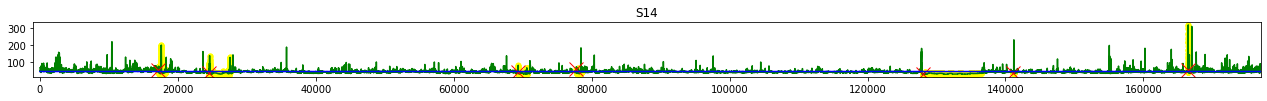

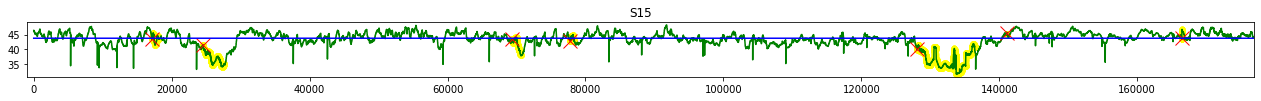

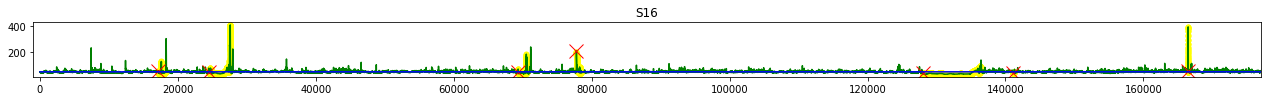

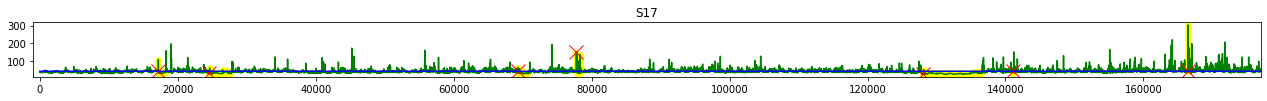

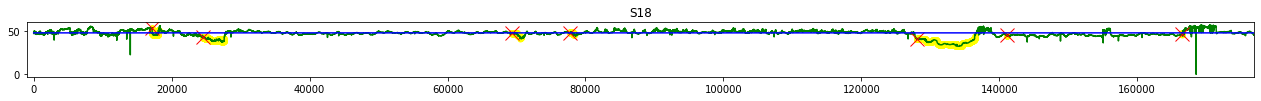

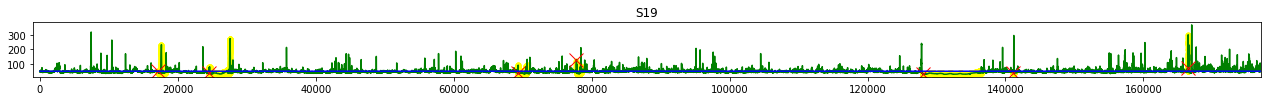

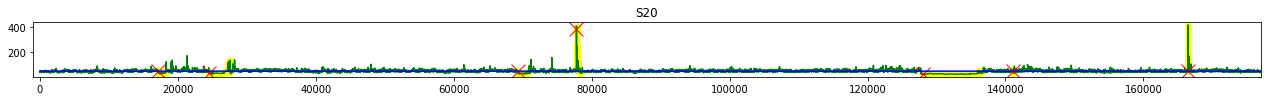

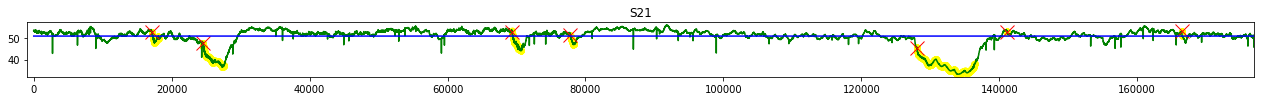

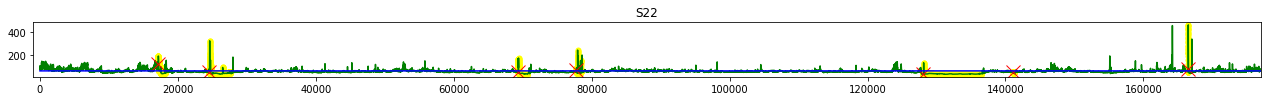

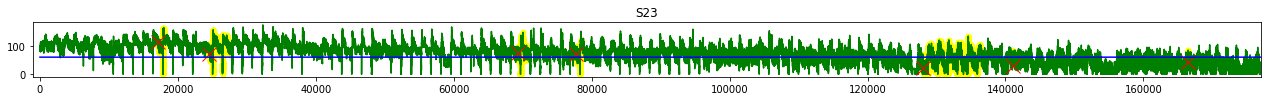

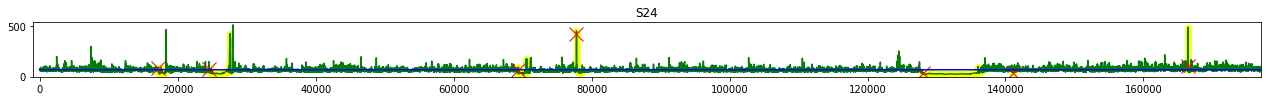

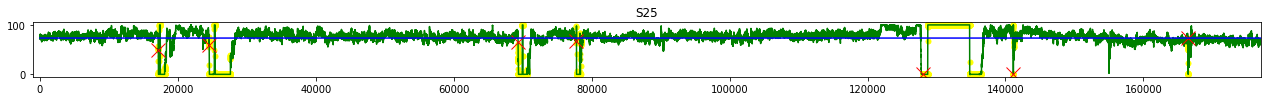

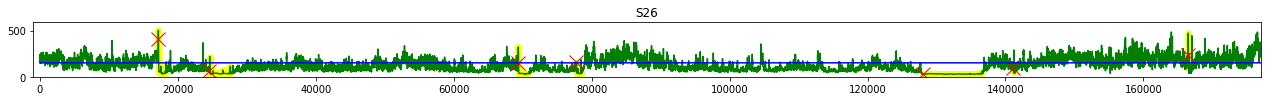

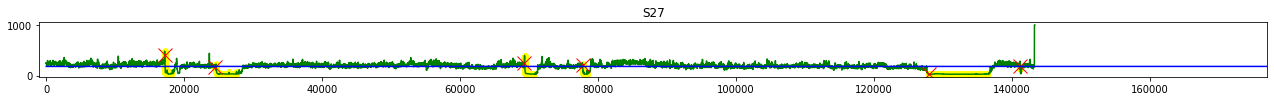

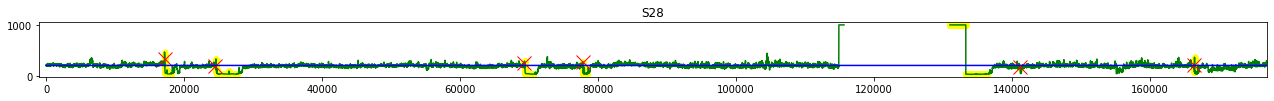

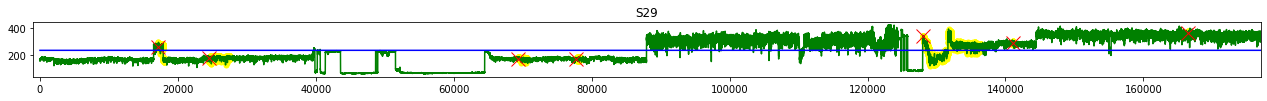

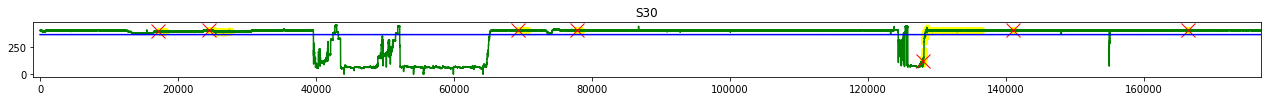

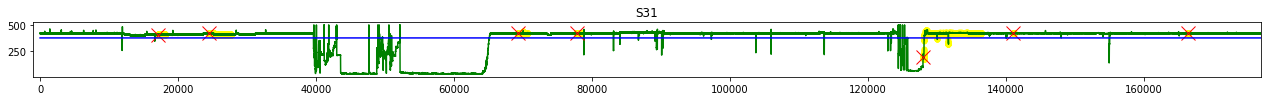

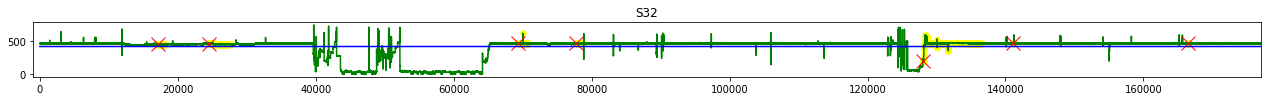

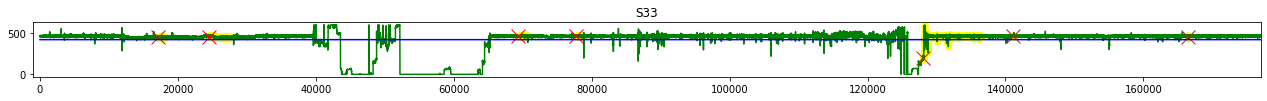

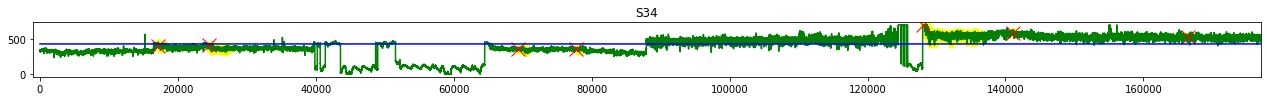

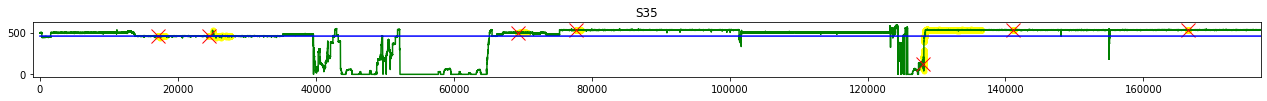

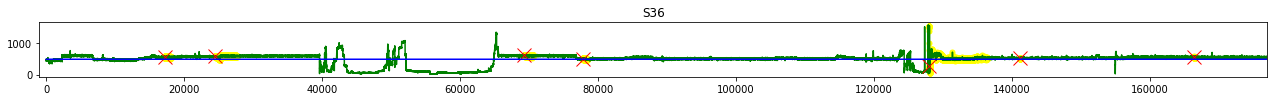

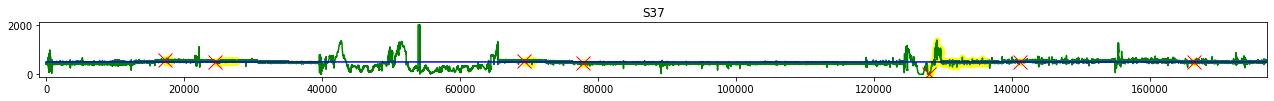

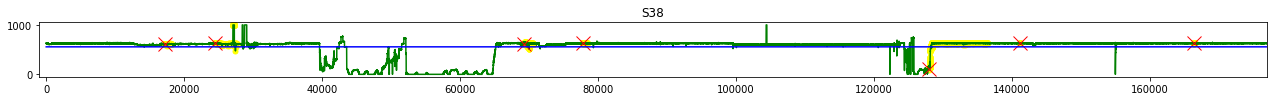

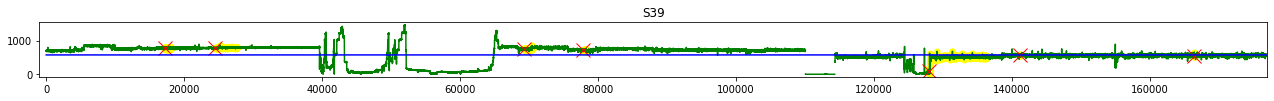

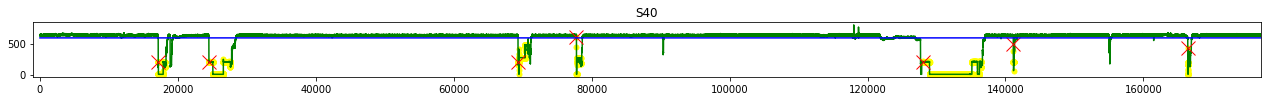

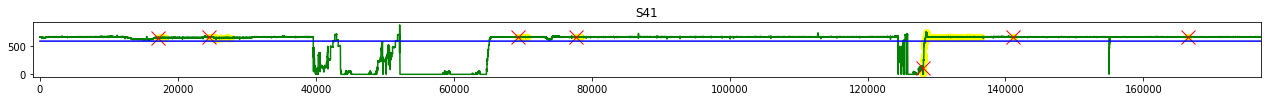

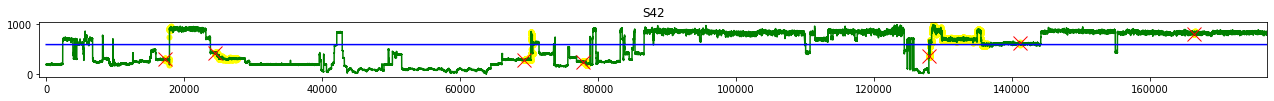

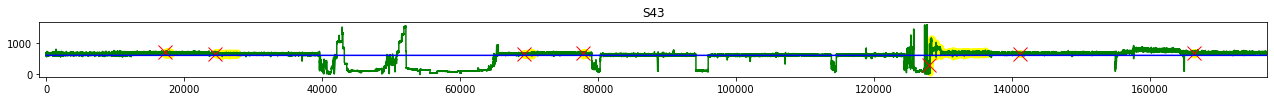

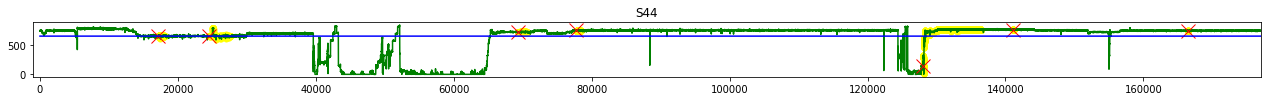

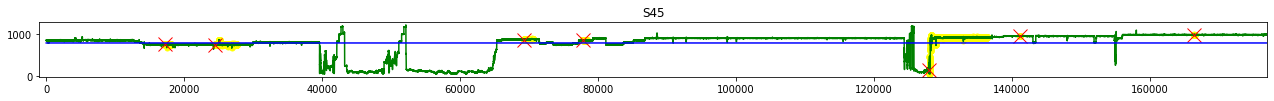

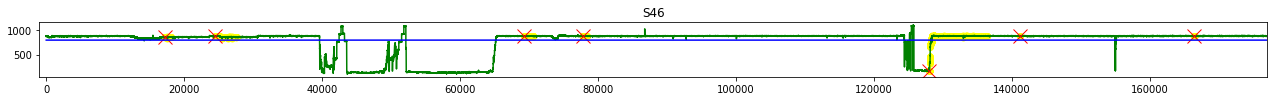

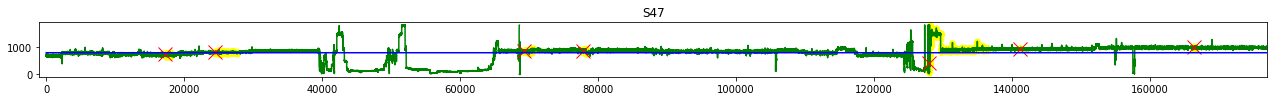

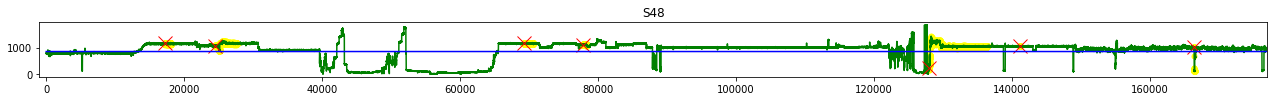

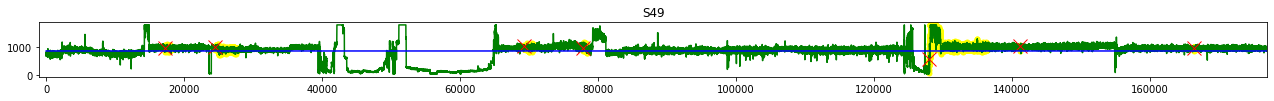

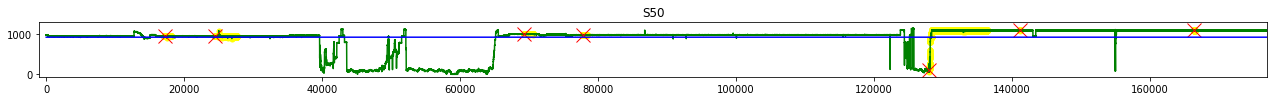

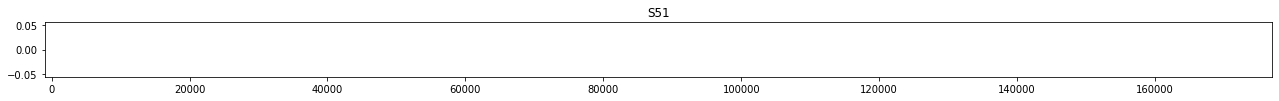

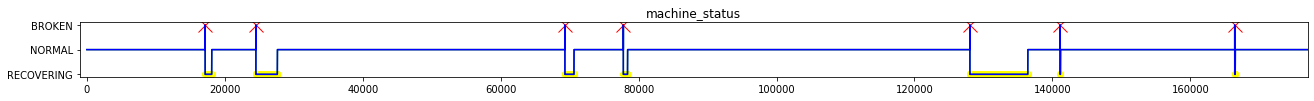

In [51]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(df_new_tag[sensor], color='green')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='x', color='red', markersize=14)
    plot = plt.title(sensor)
    plot = plt.plot(df_ideal_tag[sensor], color='blue')
    plt.xlim((-1000,177000))
    plt.show();

<div class="alert alert-success">

<h2><center><strong>Relatório</strong></center></h2>
    
<ul>
    <li>A Ordem dos sensores no dataset original não estão na ordem de funcionamento do sistema de bombeamento de água.</li>
    <li>Existem sensores que nunca chegam no zero.</li>
    <li>Existem sensores que não foram substituídos.</li>
    <li>Existem sensores que não funcionaram em todos o período amostral.</li>
    <li>Existem sensores que sua amostragem não condiz com o real funcionamento.</li>
    <li>Existe desbalanceamento no sistema alguns pontos de sobrecargas e outros em baixa eficiência.</li>
    <li>O sistema é de acionamento eletromecânico</li>
    <li>É observável, picos causados devido à cavitação</li>
    <li>É necessário uma auditória de serviços.</li>
    <li>É necessário reavaliação da atuação da equipe de manutenção.</li>
    <li>Várias manutenções (Recovering) não foram realmente realizadas.</li>
    <li>Diversas falhas com perda de sinal não foram notificadas.</li>
    <li>É necessário realizar inspeção de engenharia especializada em eletro-instrumentação para a revisão completa do sistema</li>
    <li>É necessário um retrofitting em todo o sistema</li>
    <li>A eficiência geral do processo produtivo é inferior a 50%</li>
    <li>Sugiro a investigação do processo sensor em função do tempo.</li>
	
</ul>
    
</div>